### Example of DNN models that satisify the Trace-Log-Norm condition (det X = 1)


In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import weightwatcher as ww
import torchvision.models as models

import logging
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.FATAL)

import plot_utils

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

ww.__version__

'0.7.3.1'

In [2]:
series_name = 'VGG'
all_names = [ 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn']
colors =    ['indigo', 'blue',    'purple',  'cyan',   'darkgreen','goldenrod','darkorange','red']


all_names = [ 'vgg11',  'vgg13', 'vgg16',  'vgg19', ]

all_models = []
all_models.append(models.vgg11(pretrained=True))
#all_models.append(models.vgg11_bn(pretrained=True))

all_models.append(models.vgg13(pretrained=True))
#all_models.append(models.vgg13_bn(pretrained=True))

all_models.append(models.vgg16(pretrained=True))
#all_models.append(models.vgg16_bn(pretrained=True))

all_models.append(models.vgg19(pretrained=True))
#all_models.append(models.vgg19_bn(pretrained=True))


### Plots for Theory Paper

### More Analysis

In [3]:
vgg_results = None

for im, modelname in enumerate((all_names)):
    print(im, modelname)
    watcher = ww.WeightWatcher(model=all_models[im]) 
    details = watcher.describe()
    layer_ids = details[details.layer_type=='LAYER_TYPE.DENSE'].layer_id.to_numpy()
    layer_ids = details.layer_id.to_numpy()

    layer_names = [str(x) for x in layer_ids]
    results =  watcher.analyze(layers=layer_ids, detX=True, svd_method="accurate")
    results['modelname'] = modelname

    if vgg_results is None:
        vgg_results = results
    else:
        vgg_results = pd.concat((vgg_results,results))


0 vgg11
1 vgg13
2 vgg16
3 vgg19


In [4]:
results.tail(3)

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,detX_delta,detX_num,...,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin,modelname
16,41,Linear,0.026816,4096,25088,6.125,2.263639,3.215955,0.027335,2114,...,26.345188,87.360346,success,5.132756,0.252834,,0,26.345188,0.266877,vgg19
17,44,Linear,0.032719,4096,4096,1.000,2.182559,3.582769,0.431380,2054,...,43.807162,36.037957,success,6.618698,0.000018,,6,43.807162,0.285185,vgg19
18,47,Linear,0.031979,1000,4096,4.096,2.079382,3.583847,0.165559,548,...,52.907330,25.531541,success,7.273743,0.102739,,0,52.907330,0.717356,vgg19


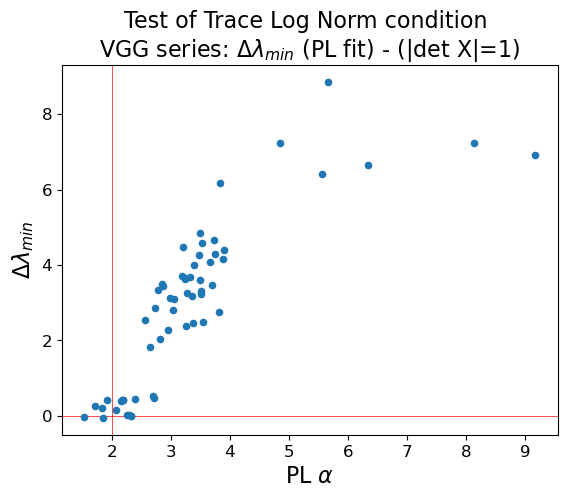

In [5]:
vgg_results.plot.scatter(x='alpha', y='detX_delta')
plt.title("Test of Trace Log Norm condition \n"+r"VGG series: $\Delta\lambda_{min}$ (PL fit) - (|det X|=1)", fontdict={'fontsize': plot_utils.MEDIUM_SIZE})
plt.xlabel(r"PL $\alpha$")
plt.ylabel(r"$\Delta\lambda_{min}$")
plt.axvline(2, linewidth=0.5, color="red", zorder=-1)
plt.axhline(0, linewidth=0.5, color="red", zorder=-1)
plt.savefig("VggTest.png")

### Plots for Paper

### ResNet

In [6]:
resnet_names = ['resnet18', 'resnet34','resnet50','resnet101','resnet152']
resnet_models = []
resnet_models.append(models.resnet18(pretrained=True))
resnet_models.append(models.resnet34(pretrained=True))
resnet_models.append(models.resnet50(pretrained=True))
resnet_models.append(models.resnet101(pretrained=True))
resnet_models.append(models.resnet152(pretrained=True))

In [7]:
resnet_results = None

for im, modelname in enumerate(resnet_names):
    print(im, modelname)
    watcher = ww.WeightWatcher(model=resnet_models[im]) 
    details = watcher.describe()
    layer_ids = details.layer_id.to_numpy()
    results =  watcher.analyze(layers=layer_ids, detX=True, svd_method="accurate", plot= False)
    results['modelname'] = modelname
    if resnet_results is None:
        resnet_results = results
    else:
        resnet_results = pd.concat((resnet_results,results))


0 resnet18
1 resnet34
2 resnet50
3 resnet101
4 resnet152


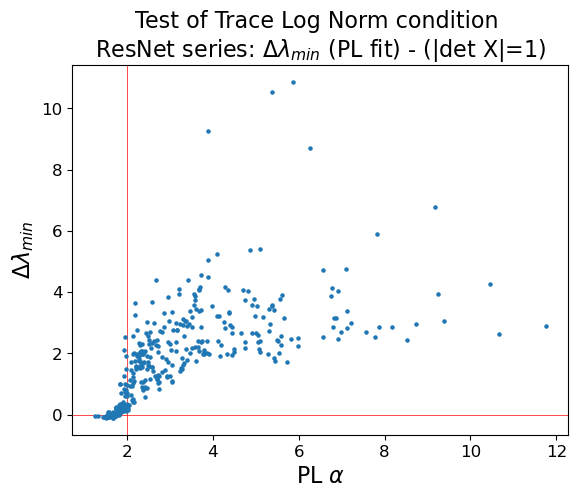

In [8]:
resnet_results.plot.scatter(x='alpha', y='detX_delta', marker='.')
# plt.ylim([-1,5])
plt.title("Test of Trace Log Norm condition \n"+r"ResNet series: $\Delta\lambda_{min}$ (PL fit) - (|det X|=1)", fontdict={'fontsize': plot_utils.MEDIUM_SIZE})
plt.xlabel(r"PL $\alpha$")
plt.ylabel(r"$\Delta\lambda_{min}$")
plt.axvline(2, linewidth=0.5, color="red", zorder=-1)
plt.axhline(0, linewidth=0.5, color="red", zorder=-1)
plt.savefig("ResNetTest.png")

<AxesSubplot: ylabel='Frequency'>

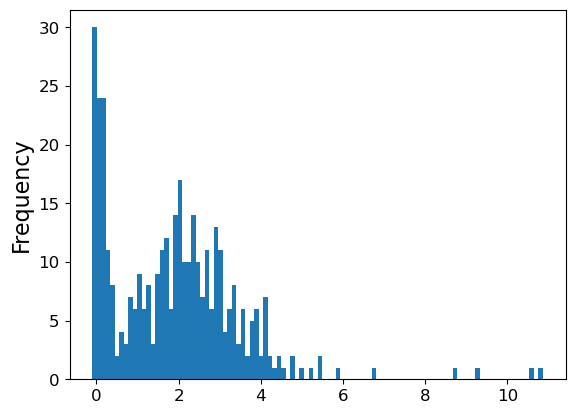

In [11]:
resnet_results.detX_delta.plot.hist(bins=100)

#### WW2X option, for back  compat for Nature paper